Mounted at /content/drive


In [3]:
!pip install jedi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.1 MB/s eta 0:00:00


In [10]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import torch
from torch import nn , optim
from torchvision import datasets , transforms
from torch.utils.data import DataLoader , random_split
import matplotlib.pyplot as plt
import jedi
jedi.settings.case_insensitive_completion = True

In [12]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

In [14]:
MRI = datasets.ImageFolder(root="A:\datasets\Dataset\Brain Tumor MRI images",transform=transform)

In [16]:
MRI_Dataloader = DataLoader(MRI,batch_size=32,shuffle=True)

In [18]:
MRI_Train_Size= int(0.8*len(MRI))
MRI_Test_Size = len(MRI) - MRI_Train_Size

In [20]:
MRI_Train_Dataset , MRI_Test_Dataset = random_split(MRI , [MRI_Train_Size,MRI_Test_Size] )

In [22]:
MRI_Trainloader=DataLoader(MRI_Train_Dataset,batch_size=32,shuffle=True)
MRI_Testloader=DataLoader(MRI_Test_Dataset,batch_size=32,shuffle=True)

In [24]:
print("length of training datasets :",len(MRI_Train_Dataset))
print("length of training datasets :",len(MRI_Test_Dataset))

length of training datasets : 4000
length of training datasets : 1000


In [26]:
print("no of classes :",MRI.classes)

no of classes : ['Healthy', 'Tumor']


In [28]:
def Show_MRI(dataloader , title="batch of MRI images"):
    images , labels = next(iter(dataloader))
    fig, axis = plt.subplots(4,8,figsize=(15, 8))
    plt.title(title)
    for i,ax in enumerate(axis.flatten()):
        if i < len(images):
            img=images[i].permute(1,2,0)
            ax.imshow(img)
            ax.set_title(MRI.classes[labels[i]])
            ax.axis('off')
    plt.show()

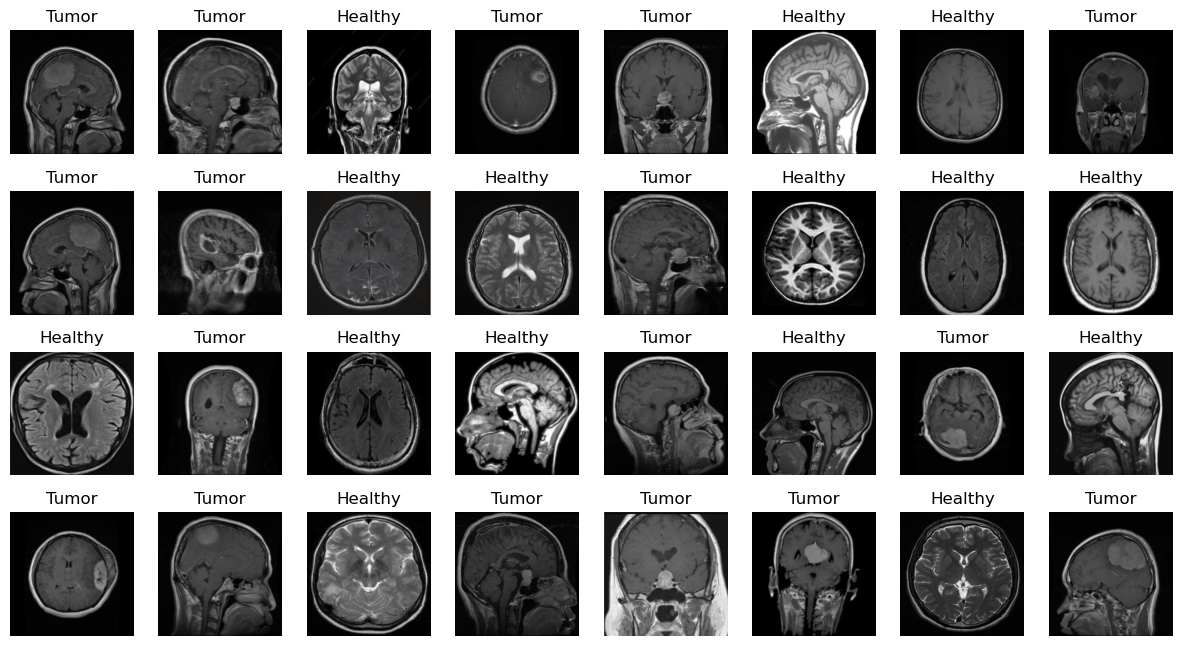

In [30]:
Show_MRI(MRI_Trainloader)

In [31]:
MRI_model=nn.Sequential(
    nn.Conv2d(3,32,3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(32,64,3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(64,128,3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(128,256,3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(256,512,3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(512,1024,3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.MaxPool2d(4,4),

    nn.Flatten(),
    nn.Linear(7*7*1024,256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256,2)

)
print(MRI_model)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (16): Flatten(start_dim=1, end_dim=-1)
  (17): Linear(in_features=50176, out_features=256, bias=True)
  (18): ReLU()
  (19)

In [ ]:
# بايبل
# بثسلي

Using device: cuda
Starting training...


Epoch 1 - Validation: 100%|██████████| 32/32 [06:40<00:00, 12.52s/it, Accuracy=81.50%]



Epoch [1]
Train Loss: 0.6397, Train Acc: 70.03%
Val Loss: 0.4019, Val Acc: 81.50%
Learning Rate: 0.001000
Class 0 Accuracy: 78.22%
Class 1 Accuracy: 83.72%
 New best model saved: best_mri_model_epoch_1_acc_81.50.pth


Epoch 2 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.75it/s, Accuracy=84.40%]



Epoch [2]
Train Loss: 0.4037, Train Acc: 80.80%
Val Loss: 0.3436, Val Acc: 84.40%
Learning Rate: 0.001000
Class 0 Accuracy: 82.67%
Class 1 Accuracy: 85.57%
 New best model saved: best_mri_model_epoch_2_acc_84.40.pth


Epoch 3 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s, Accuracy=85.80%]



Epoch [3]
Train Loss: 0.3492, Train Acc: 84.97%
Val Loss: 0.3468, Val Acc: 85.80%
Learning Rate: 0.001000
Class 0 Accuracy: 77.23%
Class 1 Accuracy: 91.61%
 New best model saved: best_mri_model_epoch_3_acc_85.80.pth
 Checkpoint saved: checkpoint_epoch_3.pth


Epoch 4 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s, Accuracy=90.50%]



Epoch [4]
Train Loss: 0.2826, Train Acc: 88.12%
Val Loss: 0.2296, Val Acc: 90.50%
Learning Rate: 0.000700
Class 0 Accuracy: 88.86%
Class 1 Accuracy: 91.61%
 New best model saved: best_mri_model_epoch_4_acc_90.50.pth


Epoch 5 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s, Accuracy=90.80%]



Epoch [5]
Train Loss: 0.2301, Train Acc: 91.33%
Val Loss: 0.2162, Val Acc: 90.80%
Learning Rate: 0.000700
Class 0 Accuracy: 86.39%
Class 1 Accuracy: 93.79%
 New best model saved: best_mri_model_epoch_5_acc_90.80.pth


Epoch 6 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s, Accuracy=91.50%]



Epoch [6]
Train Loss: 0.2234, Train Acc: 91.55%
Val Loss: 0.1975, Val Acc: 91.50%
Learning Rate: 0.000700
Class 0 Accuracy: 87.38%
Class 1 Accuracy: 94.30%
 New best model saved: best_mri_model_epoch_6_acc_91.50.pth
 Checkpoint saved: checkpoint_epoch_6.pth


Epoch 7 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.72it/s, Accuracy=93.70%]



Epoch [7]
Train Loss: 0.1742, Train Acc: 93.92%
Val Loss: 0.1605, Val Acc: 93.70%
Learning Rate: 0.000490
Class 0 Accuracy: 90.35%
Class 1 Accuracy: 95.97%
 New best model saved: best_mri_model_epoch_7_acc_93.70.pth


Epoch 8 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.75it/s, Accuracy=94.20%]



Epoch [8]
Train Loss: 0.1575, Train Acc: 94.40%
Val Loss: 0.1730, Val Acc: 94.20%
Learning Rate: 0.000490
Class 0 Accuracy: 94.80%
Class 1 Accuracy: 93.79%
 New best model saved: best_mri_model_epoch_8_acc_94.20.pth


Epoch 9 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s, Accuracy=93.80%]



Epoch [9]
Train Loss: 0.1396, Train Acc: 95.00%
Val Loss: 0.1633, Val Acc: 93.80%
Learning Rate: 0.000490
Class 0 Accuracy: 88.61%
Class 1 Accuracy: 97.32%
No improvement. Patience: 1/4
 Checkpoint saved: checkpoint_epoch_9.pth


Epoch 10 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s, Accuracy=95.00%]



Epoch [10]
Train Loss: 0.1128, Train Acc: 96.08%
Val Loss: 0.1595, Val Acc: 95.00%
Learning Rate: 0.000343
Class 0 Accuracy: 95.30%
Class 1 Accuracy: 94.80%
 New best model saved: best_mri_model_epoch_10_acc_95.00.pth


Epoch 11 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s, Accuracy=96.50%]



Epoch [11]
Train Loss: 0.0908, Train Acc: 96.85%
Val Loss: 0.1379, Val Acc: 96.50%
Learning Rate: 0.000343
Class 0 Accuracy: 95.30%
Class 1 Accuracy: 97.32%
 New best model saved: best_mri_model_epoch_11_acc_96.50.pth


Epoch 12 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s, Accuracy=96.30%]



Epoch [12]
Train Loss: 0.0944, Train Acc: 96.88%
Val Loss: 0.1286, Val Acc: 96.30%
Learning Rate: 0.000343
Class 0 Accuracy: 94.31%
Class 1 Accuracy: 97.65%
No improvement. Patience: 1/4
 Checkpoint saved: checkpoint_epoch_12.pth


Epoch 13 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.73it/s, Accuracy=95.70%]



Epoch [13]
Train Loss: 0.0646, Train Acc: 98.17%
Val Loss: 0.1579, Val Acc: 95.70%
Learning Rate: 0.000240
Class 0 Accuracy: 91.09%
Class 1 Accuracy: 98.83%
No improvement. Patience: 2/4


Epoch 14 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.72it/s, Accuracy=96.50%]



Epoch [14]
Train Loss: 0.0593, Train Acc: 97.92%
Val Loss: 0.1462, Val Acc: 96.50%
Learning Rate: 0.000240
Class 0 Accuracy: 93.81%
Class 1 Accuracy: 98.32%
No improvement. Patience: 3/4


Epoch 15 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s, Accuracy=96.60%]



Epoch [15]
Train Loss: 0.0577, Train Acc: 98.12%
Val Loss: 0.1355, Val Acc: 96.60%
Learning Rate: 0.000240
Class 0 Accuracy: 96.78%
Class 1 Accuracy: 96.48%
 New best model saved: best_mri_model_epoch_15_acc_96.60.pth
 Checkpoint saved: checkpoint_epoch_15.pth


Epoch 16 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s, Accuracy=97.50%]



Epoch [16]
Train Loss: 0.0343, Train Acc: 98.65%
Val Loss: 0.1613, Val Acc: 97.50%
Learning Rate: 0.000168
Class 0 Accuracy: 97.03%
Class 1 Accuracy: 97.82%
 New best model saved: best_mri_model_epoch_16_acc_97.50.pth


Epoch 17 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.70it/s, Accuracy=97.50%]



Epoch [17]
Train Loss: 0.0417, Train Acc: 98.65%
Val Loss: 0.1821, Val Acc: 97.50%
Learning Rate: 0.000168
Class 0 Accuracy: 96.78%
Class 1 Accuracy: 97.99%
No improvement. Patience: 1/4


Epoch 18 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s, Accuracy=97.80%]



Epoch [18]
Train Loss: 0.0273, Train Acc: 99.03%
Val Loss: 0.1611, Val Acc: 97.80%
Learning Rate: 0.000168
Class 0 Accuracy: 97.77%
Class 1 Accuracy: 97.82%
 New best model saved: best_mri_model_epoch_18_acc_97.80.pth
 Checkpoint saved: checkpoint_epoch_18.pth


Epoch 19 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.71it/s, Accuracy=97.20%]



Epoch [19]
Train Loss: 0.0286, Train Acc: 99.22%
Val Loss: 0.1527, Val Acc: 97.20%
Learning Rate: 0.000118
Class 0 Accuracy: 96.53%
Class 1 Accuracy: 97.65%
No improvement. Patience: 1/4


Epoch 20 - Validation: 100%|██████████| 32/32 [00:11<00:00,  2.68it/s, Accuracy=97.40%]



Epoch [20]
Train Loss: 0.0239, Train Acc: 99.38%
Val Loss: 0.1421, Val Acc: 97.40%
Learning Rate: 0.000118
Class 0 Accuracy: 96.29%
Class 1 Accuracy: 98.15%
No improvement. Patience: 2/4


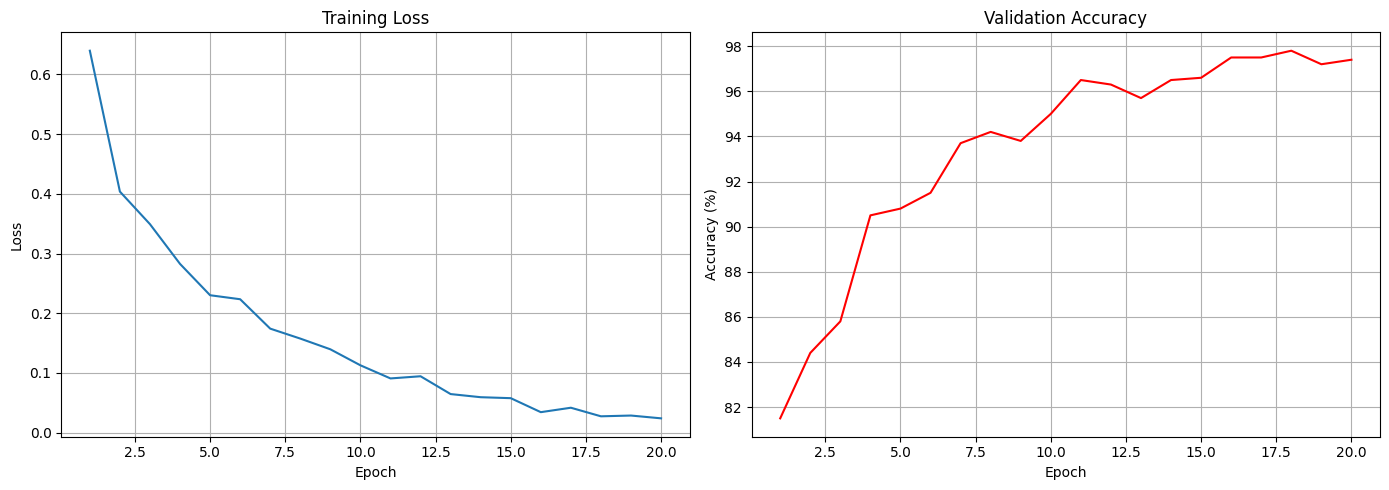

 Training completed! Best accuracy: 97.80%


In [16]:
# from tqdm import tqdm

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# MRI_model = MRI_model.to(device)

# initial_lr = 0.001
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(MRI_model.parameters(), lr=initial_lr)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)

# total_epochs = 20
# current_epoch = 0
# max_patience = 4
# patience = 0
# best_accuracy = 0.0

# train_losses = []
# val_accuracies = []

# print("Starting training...")
# print("=" * 60)

# for epoch in range(total_epochs):
# actual_epoch = current_epoch + epoch + 1

# MRI_model.train()
# running_loss = 0.0
# train_correct = 0
# train_total = 0

# train_pbar = tqdm(MRI_Trainloader, desc=f"Epoch {actual_epoch} - Training")
# for batch_idx, (images, labels) in enumerate(train_pbar):
#     images, labels = images.to(device), labels.to(device)

#     optimizer.zero_grad()
#     outputs = MRI_model(images)
#     loss = criterion(outputs, labels)
#     loss.backward()
#     torch.nn.utils.clip_grad_norm_(MRI_model.parameters(), max_norm=1.0)
#     optimizer.step()

#     running_loss += loss.item()
#     _, predicted = torch.max(outputs, 1)
#     train_total += labels.size(0)
#     train_correct += (predicted == labels).sum().item()

#     train_pbar.set_postfix({'Loss': f'{loss.item():.4f}', 'Train Acc': f'{100 * train_correct / train_total:.2f}%'})

# MRI_model.eval()
# val_loss = 0.0
# correct = 0
# total = 0
# all_labels = []
# all_prediction = []

# test_pbar = tqdm(MRI_Testloader, desc=f"Epoch {actual_epoch} - Validation")
# with torch.inference_mode():
#     for batch_idx, (images, labels) in enumerate(test_pbar):
#         images, labels = images.to(device), labels.to(device)
#         outputs = MRI_model(images)
#         loss = criterion(outputs, labels)
#         val_loss += loss.item()

#         _, prediction = torch.max(outputs, 1)
#         all_labels.extend(labels.cpu().numpy())
#         all_prediction.extend(prediction.cpu().numpy())

#         total += labels.size(0)
#         correct += (prediction == labels).sum().item()
#         test_pbar.set_postfix({'Accuracy': f'{100 * correct / total:.2f}%'})

# epoch_train_loss = running_loss / len(MRI_Trainloader)
# epoch_val_loss = val_loss / len(MRI_Testloader)
# epoch_train_acc = 100 * train_correct / train_total
# epoch_val_acc = 100 * correct / total

# train_losses.append(epoch_train_loss)
# val_accuracies.append(epoch_val_acc)

# prediction_counts = np.bincount(all_prediction, minlength=2)
# true_counts = np.bincount(all_labels, minlength=2)

# class_accuracies = []
# for class_id in range(len(true_counts)):
#     if true_counts[class_id] > 0:
#         acc = 100 * np.sum((np.array(all_prediction) == class_id) & (np.array(all_labels) == class_id)) / true_counts[class_id]
#         class_accuracies.append((class_id, acc))
#     else:
#         class_accuracies.append((class_id, 0))

# print(f"\nEpoch [{actual_epoch}]\nTrain Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%")
# print(f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%")
# print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")
# for class_id, acc in class_accuracies:
#     print(f"Class {class_id} Accuracy: {acc:.2f}%")

# if epoch_val_acc > best_accuracy:
#     best_accuracy = epoch_val_acc
#     patience = 0
#     model_name = f"best_mri_model_epoch_{actual_epoch}_acc_{epoch_val_acc:.2f}.pth"
#     torch.save({
#         'epoch': actual_epoch,
#         'model_state_dict': MRI_model.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict(),
#         'accuracy': epoch_val_acc,
#         'loss': epoch_val_loss
#     }, model_name)
#     print(f" New best model saved: {model_name}")
# else:
#     patience += 1
#     print(f"No improvement. Patience: {patience}/{max_patience}")

# if patience >= max_patience:
#     print(" Early stopping triggered")
#     break

# if (epoch + 1) % 3 == 0:
#     checkpoint_name = f"checkpoint_epoch_{actual_epoch}.pth"
#     torch.save({
#         'epoch': actual_epoch,
#         'model_state_dict': MRI_model.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict(),
#         'scheduler_state_dict': scheduler.state_dict(),
#         'accuracy': epoch_val_acc,
#         'best_accuracy': best_accuracy,
#         'train_losses': train_losses,
#         'val_accuracies': val_accuracies
#     }, checkpoint_name)
#     print(f" Checkpoint saved: {checkpoint_name}")

# scheduler.step()


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# ax1.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
# ax1.set_title('Training Loss')
# ax1.set_xlabel('Epoch')
# ax1.set_ylabel('Loss')
# ax1.grid(True)

# ax2.plot(range(1, len(val_accuracies)+1), val_accuracies, label='Validation Accuracy', color='red')
# ax2.set_title('Validation Accuracy')
# ax2.set_xlabel('Epoch')
# ax2.set_ylabel('Accuracy (%)')
# ax2.grid(True)

# plt.tight_layout()
# plt.savefig('training_progress_combined.png', dpi=300)
# plt.show()

# print(f" Training completed! Best accuracy: {best_accuracy:.2f}%")


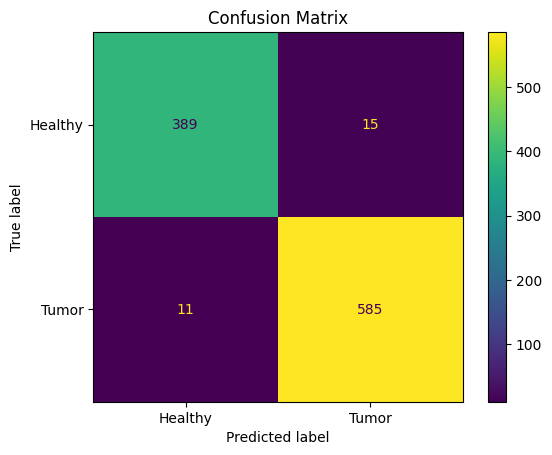

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(all_labels, all_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Tumor"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Using device: cpu


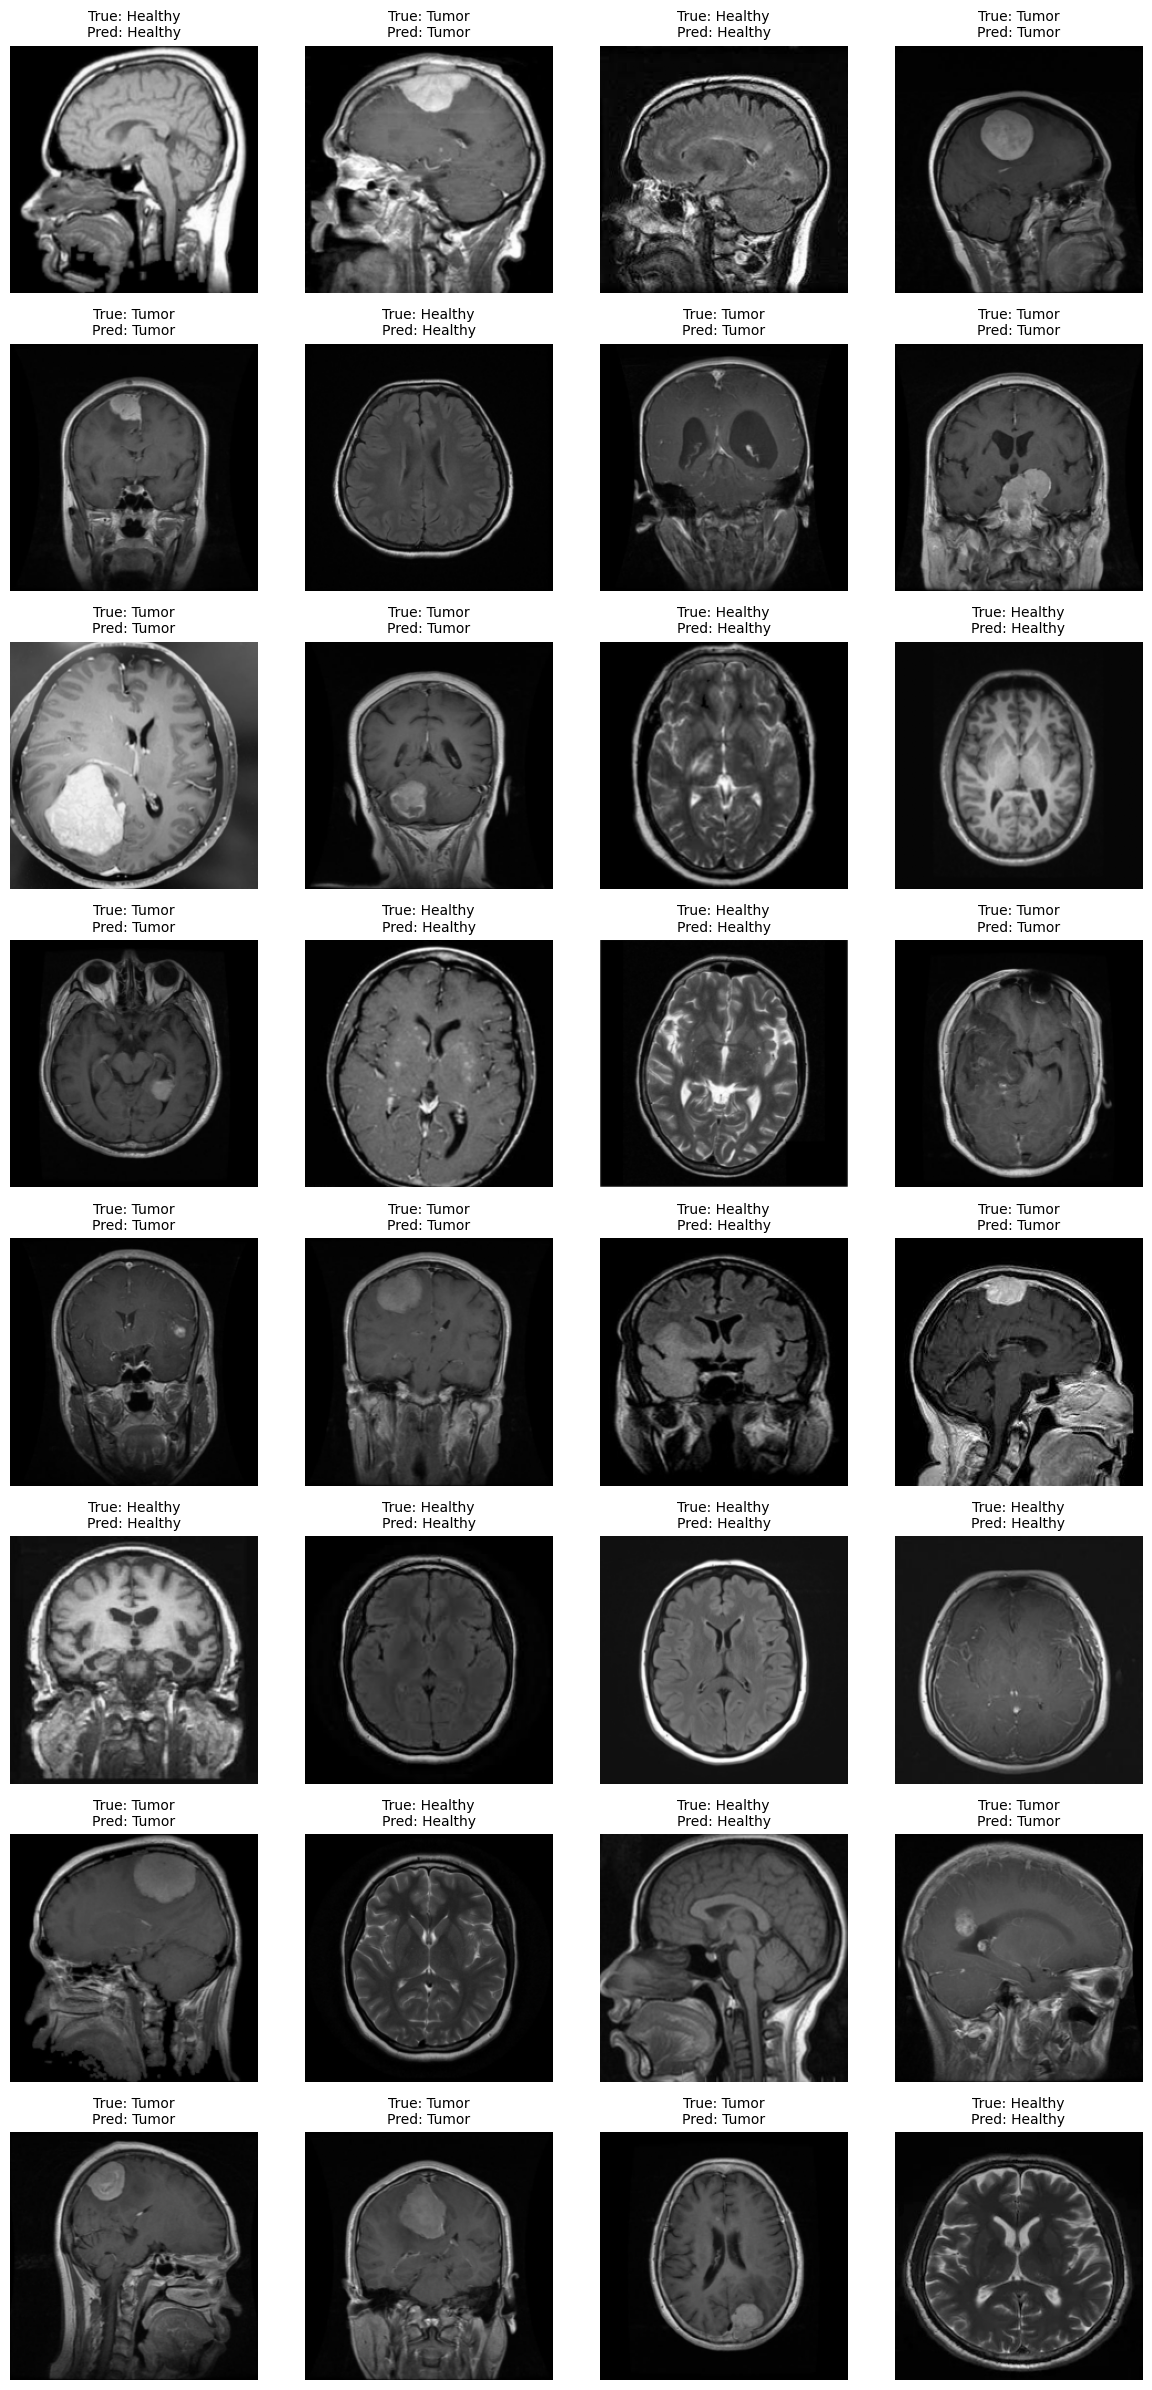

In [36]:
import torch
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# تأكد من وجود تعريف MRI_model نفسه المستخدم في التدريب
MRI_model = MRI_model.to(device)  # لا تعيد كتابته MRI_model() لأنه معرف بالفعل

# تحميل الملف المحفوظ
checkpoint = torch.load('best_mri_model_epoch_18_acc_97.80.pth', map_location=device)

# تحميل weights إلى النموذج
MRI_model.load_state_dict(checkpoint['model_state_dict'])
MRI_model.eval()

# الحصول على دفعة من بيانات الاختبار
mri_images, mri_labels = next(iter(MRI_Testloader))
mri_images, mri_labels = mri_images.to(device), mri_labels.to(device)

# التنبؤ
with torch.inference_mode():
    logits = MRI_model(mri_images)
    _, predicted_indices = torch.max(logits, 1)

# تحويل الفئات إلى أسماء
true_labels = [MRI.classes[label.item()] for label in mri_labels]
predicted_labels = [MRI.classes[pred.item()] for pred in predicted_indices]

# عرض الصور مع التسمية
batch_size = len(mri_images)
cols = 4
rows = (batch_size + cols - 1) // cols

plt.figure(figsize=(12, rows * 3))
for idx in range(batch_size):
    plt.subplot(rows, cols, idx + 1)
    img = mri_images[idx].cpu().permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [38]:
# حساب الدقة (Accuracy) للدفعة
correct = sum([true == pred for true, pred in zip(true_labels, predicted_labels)])
accuracy = correct / len(true_labels) * 100
print(f"Batch Accuracy: {accuracy:.2f}%")


Batch Accuracy: 100.00%
